In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "NanumGothic"
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import RobustScaler

In [19]:
ctrain=pd.read_csv("./data/ctrain.csv")
ctrain.head()

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,...,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target
0,201901,1,3,1,1,12,2,0,3,0,...,0.0000,0.0000,1.2612,1.2002,1.1701,0.9793,10.0000,0.0,2.0,1
1,201901,3,8,22,4,2,1,1,4,0,...,0.5770,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,0
2,201901,3,8,22,1,2,1,1,4,0,...,0.2885,0.0000,0.0023,0.0000,0.1508,0.0000,0.0000,1.0,0.0,1
3,201901,3,8,23,2,8,2,0,9,0,...,0.0680,0.0587,0.1920,0.0000,0.0863,0.0000,1.4444,0.0,0.0,1
4,201901,3,8,23,9,8,2,0,0,0,...,0.0000,0.0000,0.1920,0.0000,0.0863,0.0000,1.3333,0.0,0.0,1


In [15]:
category_list=['질병경중등급코드', 'KCD등급코드', '질병구분코드', '발생지역구분코드', '치료행위코드',
'의료기관구분코드', '요양병원여부', '고객나이구분코드', '부담보5년경과여부', '부실모집설계사계약여부',
'중도부가계약여부', '건강인우대계약가입여부', '보험사기이력고객여부', '보험료구간코드', '가입금액구간코드',
'청구일계약일간기간구분코드', '청구일부활일간기간구분코드']

In [16]:
for i in category_list:
    ctrain[i] = ctrain[i].astype("category")

1    226036
0     93793
2     58099
Name: target, dtype: int64


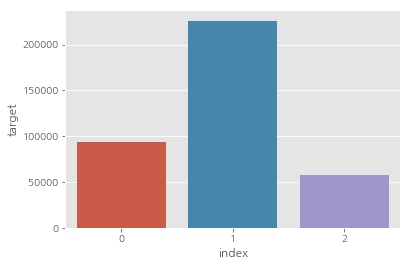

In [17]:
print(ctrain["target"].value_counts())
sns.barplot(data=ctrain["target"].value_counts().reset_index(), x="index", y="target")

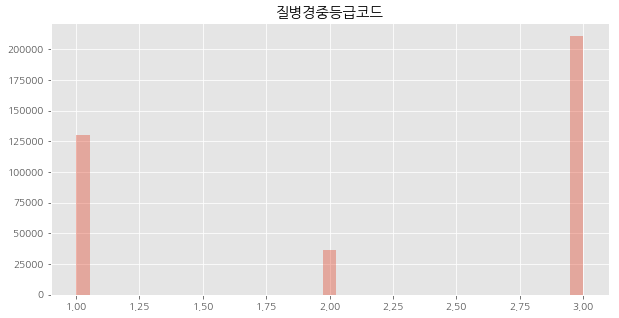

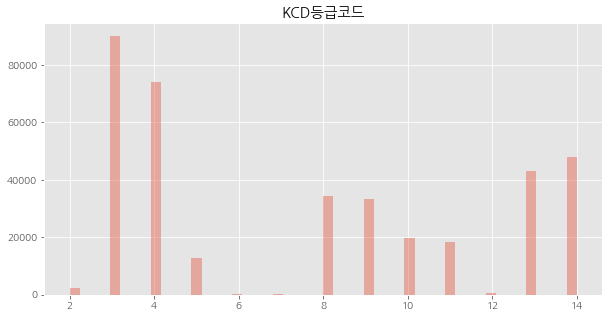

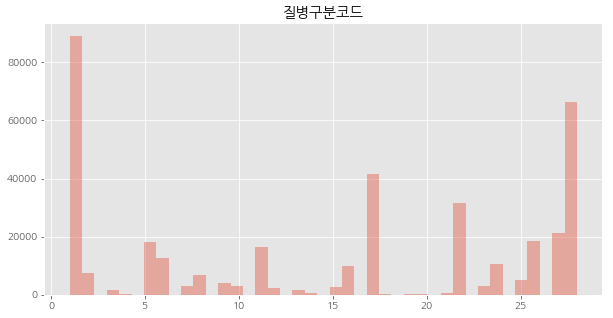

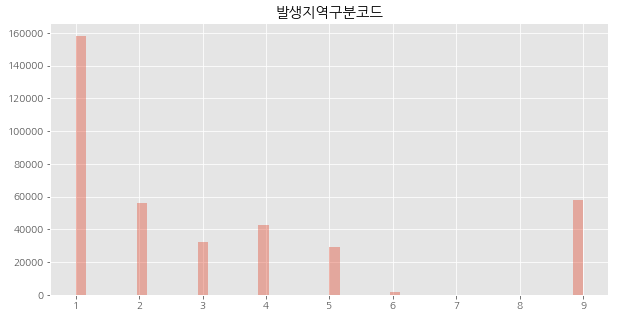

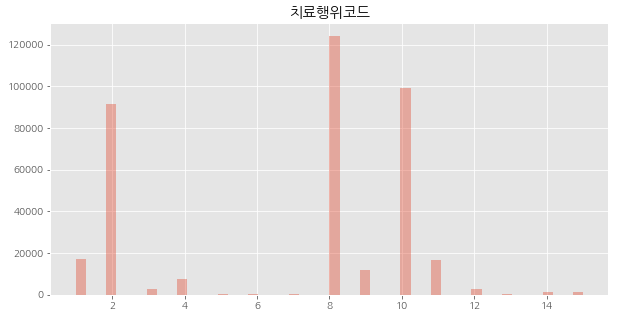

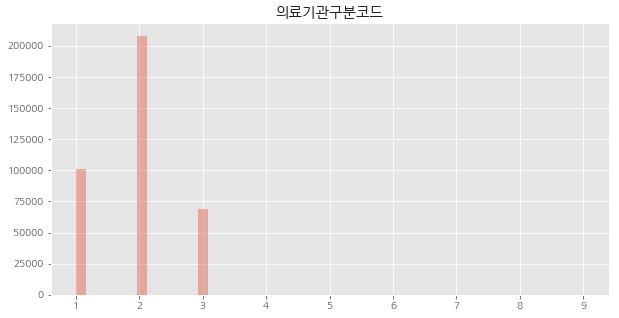

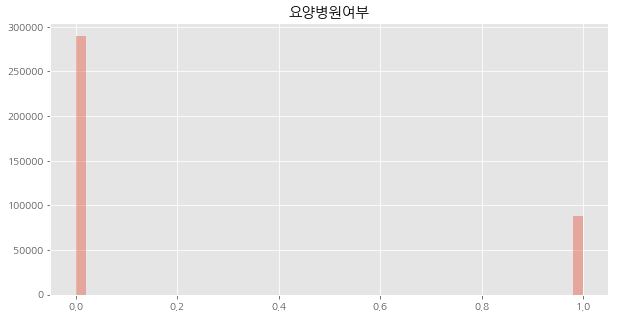

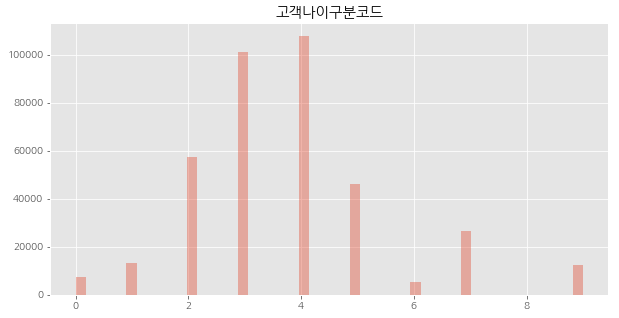

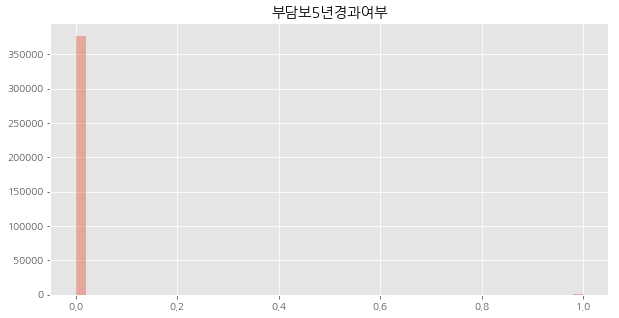

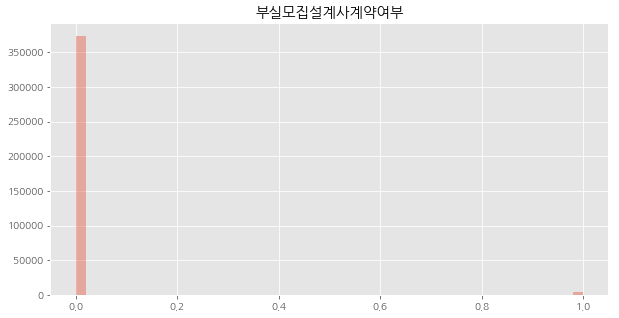

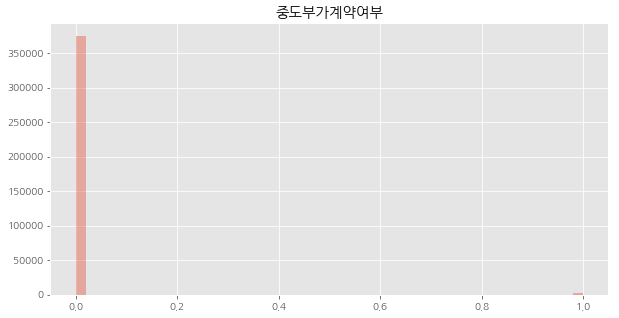

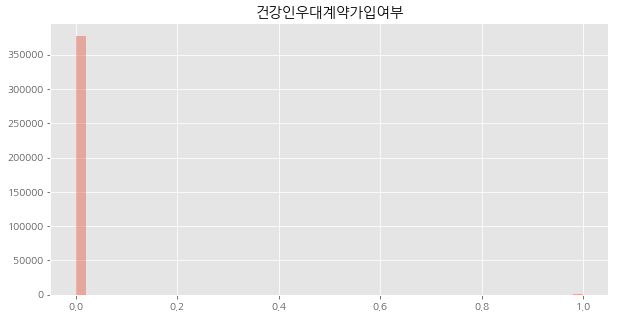

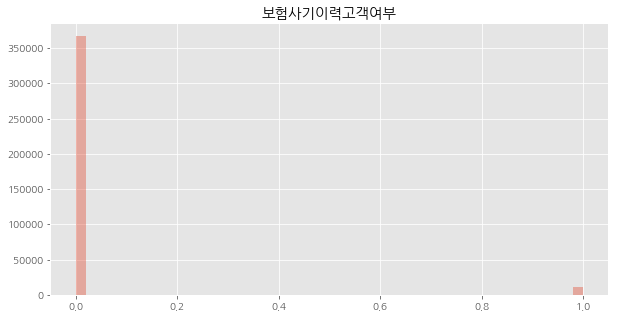

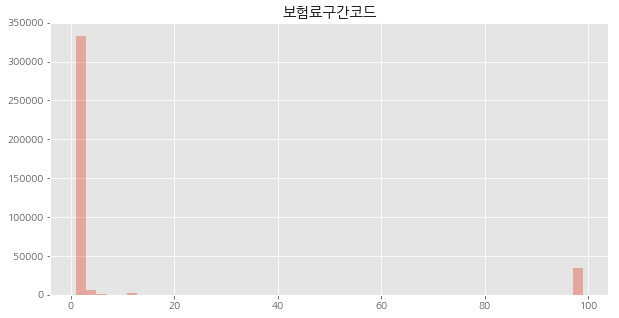

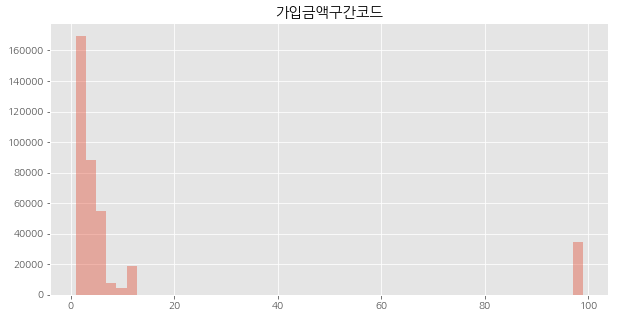

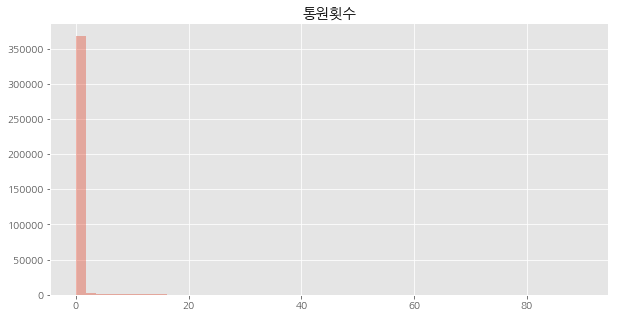

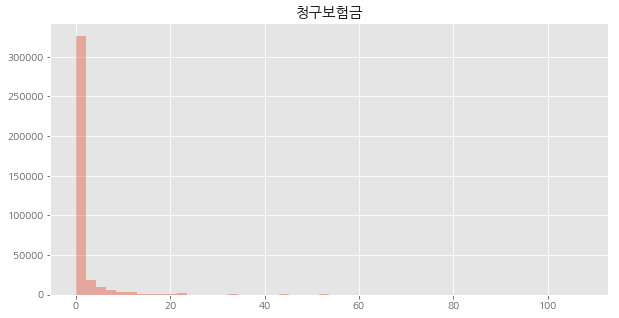

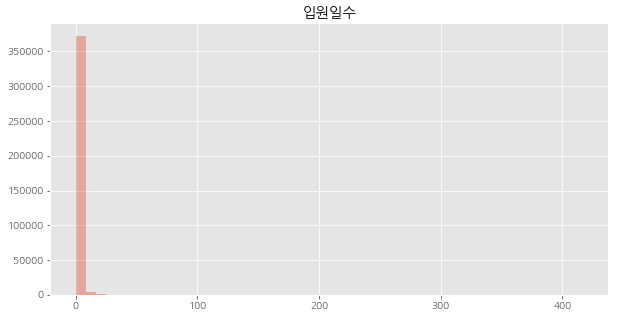

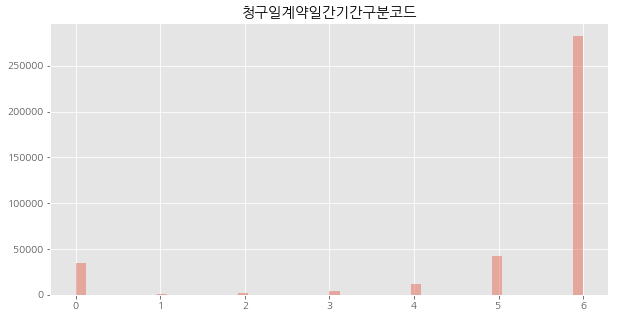

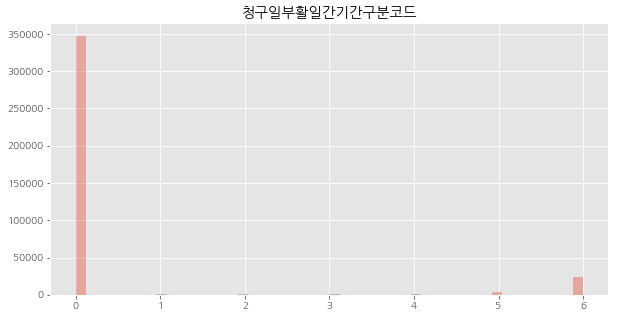

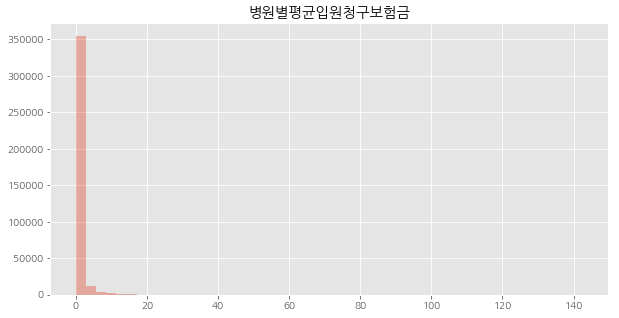

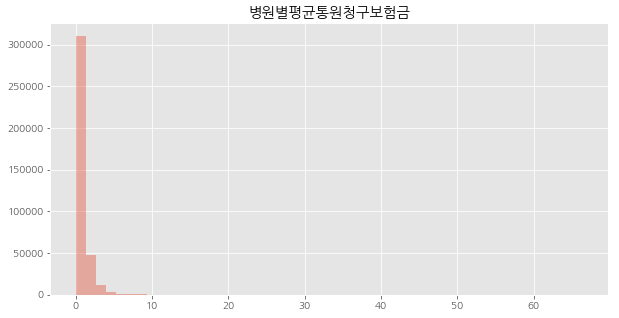

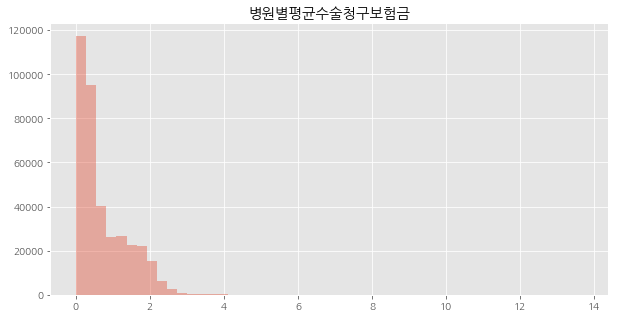

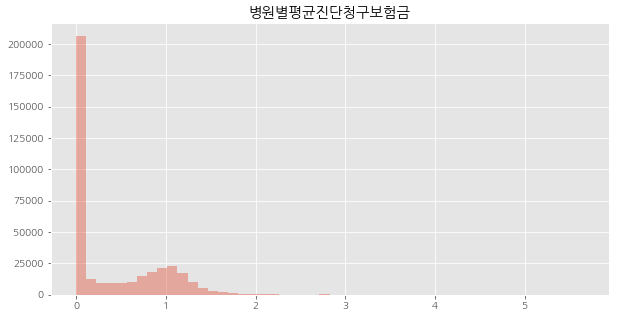

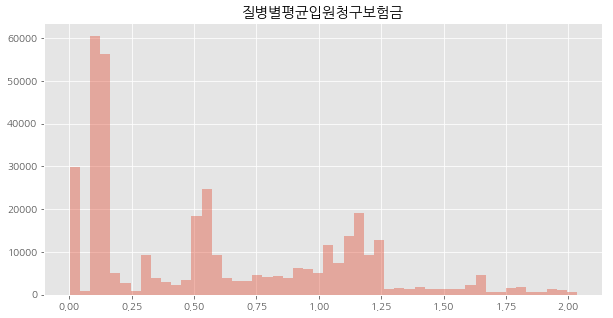

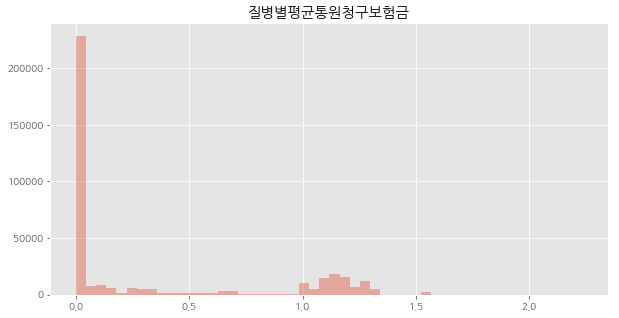

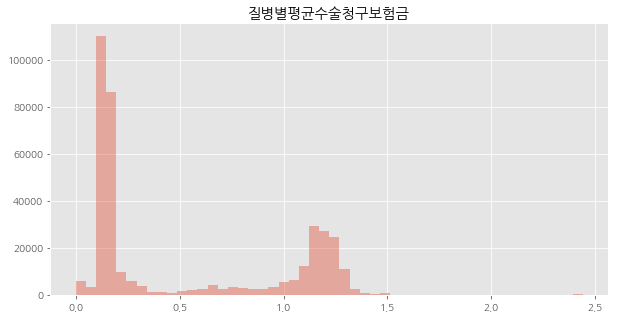

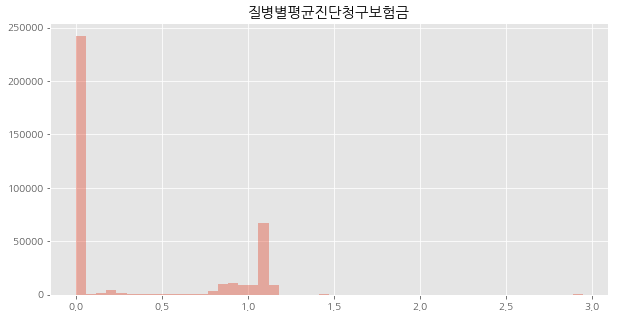

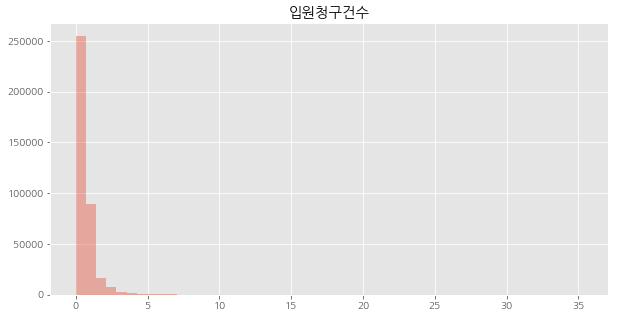

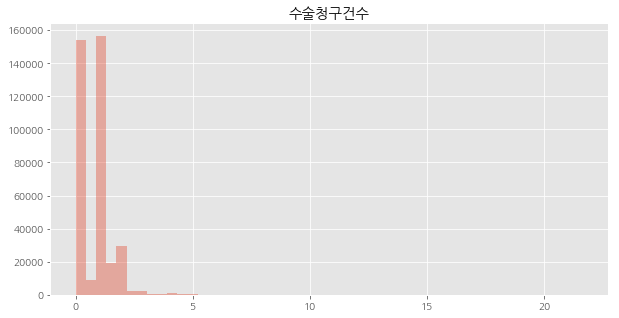

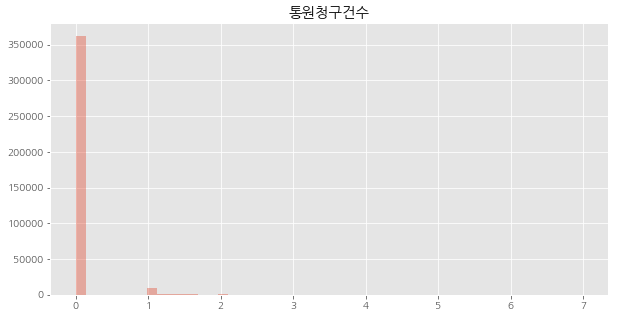

In [6]:
for col in ctrain.columns[1:-1]:
    plt.figure(figsize = (10, 5))
    plt.title(f"{col}")
    sns.distplot(ctrain[col].values, kde=False)

In [20]:
corr=ctrain.corr()
corr

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,...,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target
접수년월,1.000000,-0.024522,-0.014901,-0.020378,-0.017568,-0.008452,0.003411,0.008278,-0.012102,0.005357,...,0.004848,0.011786,0.014662,0.059436,0.043979,0.012367,0.007410,-0.022112,-0.012939,-0.006731
질병경중등급코드,-0.024522,1.000000,0.481268,0.937738,-0.050535,-0.150504,-0.416935,0.219638,-0.091890,0.004954,...,-0.357076,-0.407796,-0.818222,-0.679173,-0.876306,-0.876247,-0.210354,0.321330,-0.220972,-0.445940
KCD등급코드,-0.014901,0.481268,1.000000,0.380687,0.017490,0.101699,-0.182331,-0.007285,-0.011416,-0.008849,...,-0.269186,-0.276532,-0.341623,-0.492804,-0.473509,-0.463271,-0.049132,0.016922,-0.180388,-0.159801
질병구분코드,-0.020378,0.937738,0.380687,1.000000,-0.072592,-0.224000,-0.409806,0.231639,-0.123045,0.004613,...,-0.313812,-0.357626,-0.853404,-0.730031,-0.851255,-0.823872,-0.256198,0.370131,-0.222671,-0.470490
발생지역구분코드,-0.017568,-0.050535,0.017490,-0.072592,1.000000,0.039973,-0.038552,-0.020448,0.301480,-0.002757,...,-0.059841,-0.074118,0.087769,0.011839,0.044644,0.020347,0.038783,-0.068483,-0.026193,0.210415
치료행위코드,-0.008452,-0.150504,0.101699,-0.224000,0.039973,1.000000,0.246745,-0.248938,-0.001259,-0.010682,...,0.070596,0.080744,0.197495,0.118192,0.148333,0.120937,0.463889,-0.069366,0.062497,0.124688
의료기관구분코드,0.003411,-0.416935,-0.182331,-0.409806,-0.038552,0.246745,1.000000,-0.583462,-0.006977,-0.006111,...,0.501977,0.563053,0.389906,0.330926,0.390487,0.383372,0.134997,-0.183857,0.123576,0.193999
요양병원여부,0.008278,0.219638,-0.007285,0.231639,-0.020448,-0.248938,-0.583462,1.000000,-0.008465,0.018310,...,-0.308284,-0.390700,-0.231900,-0.120618,-0.194637,-0.167336,-0.105940,0.177717,-0.076263,-0.133112
고객나이구분코드,-0.012102,-0.091890,-0.011416,-0.123045,0.301480,-0.001259,-0.006977,-0.008465,1.000000,0.020355,...,-0.030077,-0.020414,0.090192,0.007192,0.054658,0.042317,0.035290,-0.031357,-0.037480,0.209249
부담보5년경과여부,0.005357,0.004954,-0.008849,0.004613,-0.002757,-0.010682,-0.006111,0.018310,0.020355,1.000000,...,-0.001123,-0.006853,-0.006598,0.008330,-0.004481,-0.001657,-0.008344,0.009647,-0.004353,0.001534


In [21]:
corr["질병구분코드"]

접수년월            -0.020378
질병경중등급코드         0.937738
KCD등급코드          0.380687
질병구분코드           1.000000
발생지역구분코드        -0.072592
치료행위코드          -0.224000
의료기관구분코드        -0.409806
요양병원여부           0.231639
고객나이구분코드        -0.123045
부담보5년경과여부        0.004613
부실모집설계사계약여부      0.000982
중도부가계약여부         0.029721
건강인우대계약가입여부      0.022846
보험사기이력고객여부      -0.023851
보험료구간코드         -0.165399
가입금액구간코드        -0.154141
통원횟수            -0.149587
청구보험금           -0.293025
입원일수            -0.122353
청구일계약일간기간구분코드    0.150298
청구일부활일간기간구분코드   -0.044943
병원별평균입원청구보험금    -0.250680
병원별평균통원청구보험금    -0.263152
병원별평균수술청구보험금    -0.313812
병원별평균진단청구보험금    -0.357626
질병별평균입원청구보험금    -0.853404
질병별평균통원청구보험금    -0.730031
질병별평균수술청구보험금    -0.851255
질병별평균진단청구보험금    -0.823872
입원청구건수          -0.256198
수술청구건수           0.370131
통원청구건수          -0.222671
target          -0.470490
Name: 질병구분코드, dtype: float64

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(ctrain.values, i) for i in range(ctrain.shape[1])]
vif["features"] = ctrain.columns
vif

,VIF Factor,features
0,199.474802,접수년월
1,14.740352,질병경중등급코드
2,1.767322,KCD등급코드
3,14.516059,질병구분코드
4,1.369377,발생지역구분코드
5,1.529914,치료행위코드
6,2.289035,의료기관구분코드
7,1.705980,요양병원여부
8,1.412741,고객나이구분코드
9,1.003322,부담보5년경과여부


In [113]:
for col in ctrain.columns[1:-1]:
    if col not in category_list:
        ctrain[col] = np.sqrt(ctrain[col])

In [114]:
ctrain

,접수년월,질병경중등급코드,KCD등급코드,질병구분코드,발생지역구분코드,치료행위코드,의료기관구분코드,요양병원여부,고객나이구분코드,부담보5년경과여부,...,병원별평균수술청구보험금,병원별평균진단청구보험금,질병별평균입원청구보험금,질병별평균통원청구보험금,질병별평균수술청구보험금,질병별평균진단청구보험금,입원청구건수,수술청구건수,통원청구건수,target
0,201901,1,3,1,1,12,2,0,3,0,...,0.000000,0.000000,1.123032,1.095536,1.081712,0.989596,3.162278,0.000000,1.414214,1
1,201901,3,8,22,4,2,1,1,4,0,...,0.759605,0.000000,0.047958,0.000000,0.388330,0.000000,0.000000,1.000000,0.000000,0
2,201901,3,8,22,1,2,1,1,4,0,...,0.537122,0.000000,0.047958,0.000000,0.388330,0.000000,0.000000,1.000000,0.000000,1
3,201901,3,8,23,2,8,2,0,9,0,...,0.260768,0.242281,0.438178,0.000000,0.293769,0.000000,1.201832,0.000000,0.000000,1
4,201901,3,8,23,9,8,2,0,0,0,...,0.000000,0.000000,0.438178,0.000000,0.293769,0.000000,1.154686,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377923,201911,1,3,1,1,11,2,0,3,0,...,1.028980,1.109955,1.079815,1.077497,1.138200,1.053233,1.150739,1.000000,0.000000,2
377924,201904,1,3,1,9,9,2,0,7,0,...,1.139868,0.747329,1.009901,1.105803,1.086784,1.037352,2.581995,0.888594,0.000000,2
377925,201907,1,9,6,9,8,2,1,7,0,...,0.000000,0.000000,1.248799,0.000000,1.010990,0.917442,0.850529,0.000000,0.000000,2
377926,201909,1,3,1,4,10,3,0,3,0,...,1.187266,0.938723,1.097269,1.117989,1.129867,1.050524,0.816517,1.000000,0.000000,2


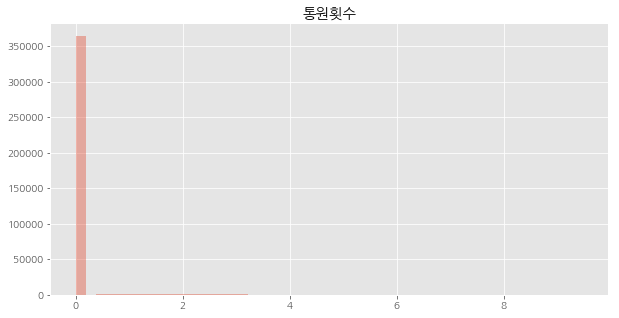

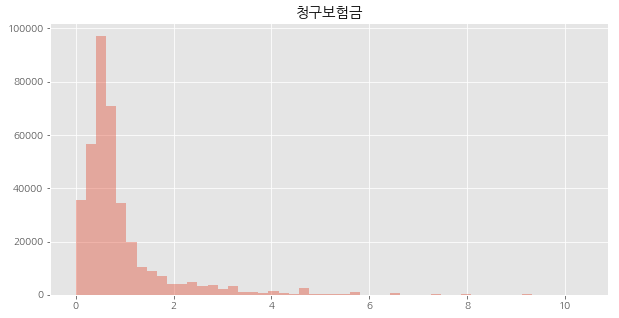

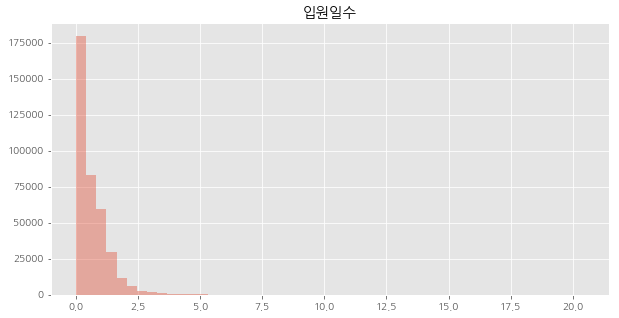

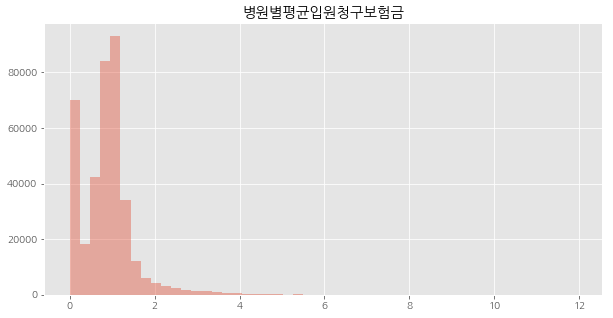

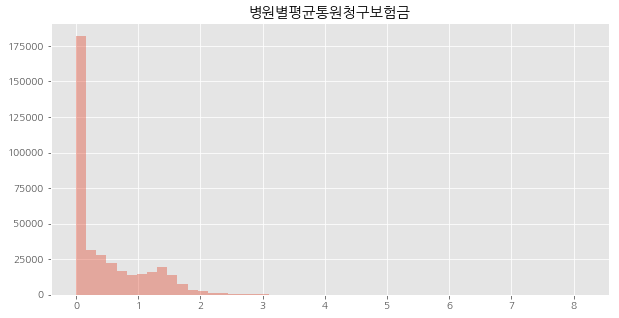

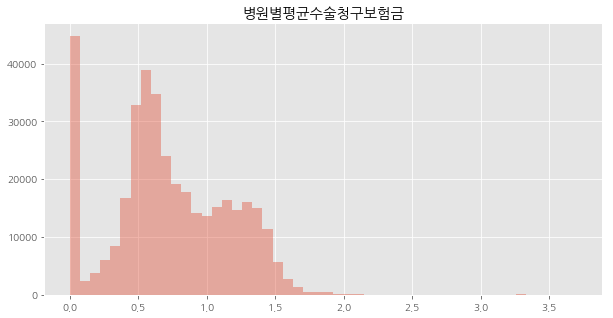

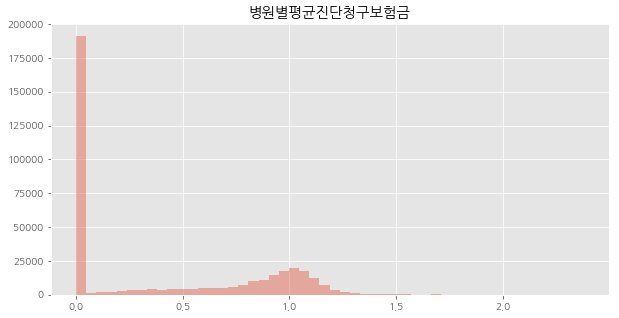

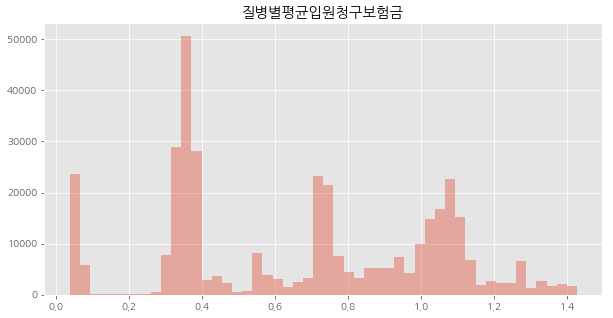

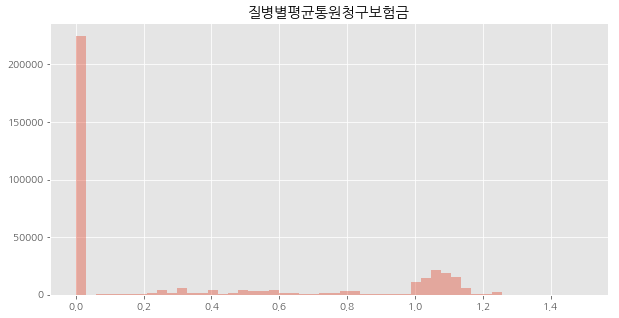

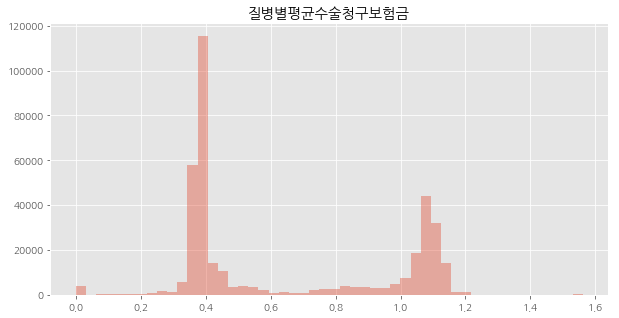

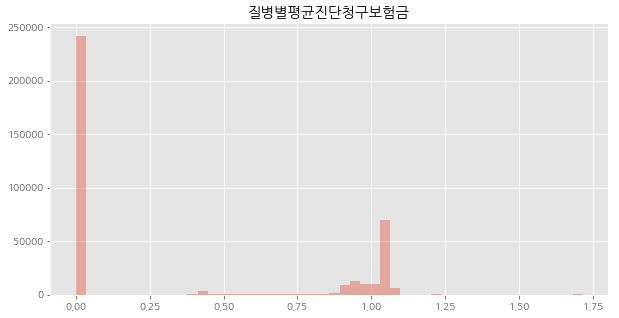

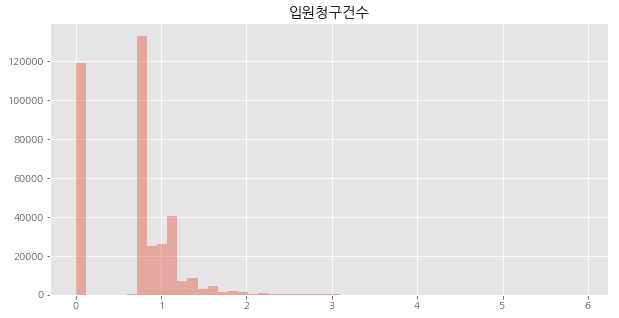

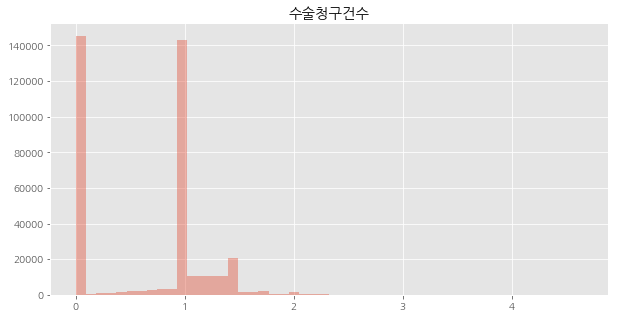

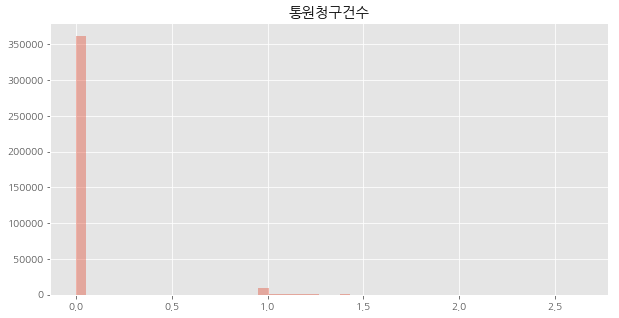

In [115]:
for col in ctrain.columns[1:-1]:
    if col not in category_list:
        plt.figure(figsize = (10, 5))
        plt.title(f"{col}")
        sns.distplot(ctrain[col].values, kde=False)